# ** DIscBIO: a user-friendly pipeline for biomarker discovery in single-cell transcriptomics**

The pipeline consists of four successive steps: data pre-processing, cellular clustering and pseudo-temporal ordering, determining differential expressed genes and identifying biomarkers.

##                                                               PART 4

## Running the DIscBIO pipeline based on a list of genes related to Golgi Fragmentation
                                                   

![DIsccBIO](DiscBIO.png)

## Required Packages

In [1]:
library(DIscBIO)
library(partykit)
library(enrichR)
library(ggplot2)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tap

## 3. Identifying DEGs

###   Identifying DEGs using binomial differential expression

In [2]:
load("FGcdiffBinomial.RData")

#### To show the result table
head(FGcdiffBinomial[[1]])                  # The first component 
head(FGcdiffBinomial[[2]])                  # The second component

DEGsE,DEGsS
ENSG00000000938,FGR
ENSG00000001036,FUCA2
ENSG00000001630,CYP51A1
ENSG00000002586,CD99
ENSG00000003147,ICA1
ENSG00000003402,CFLAR


,Target Cluster,VS,Gene number,File name,Gene number,File name
,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA
3,Cluster 3,Remaining Clusters,1346,UpRegulated-DEG-cluster3.csv,790,DownRegulated-DEG-cluster3.csv
4,Cluster 4,Remaining Clusters,3,UpRegulated-DEG-cluster3.csv,0,DownRegulated-DEG-cluster3.csv


#### Plotting the DEGs

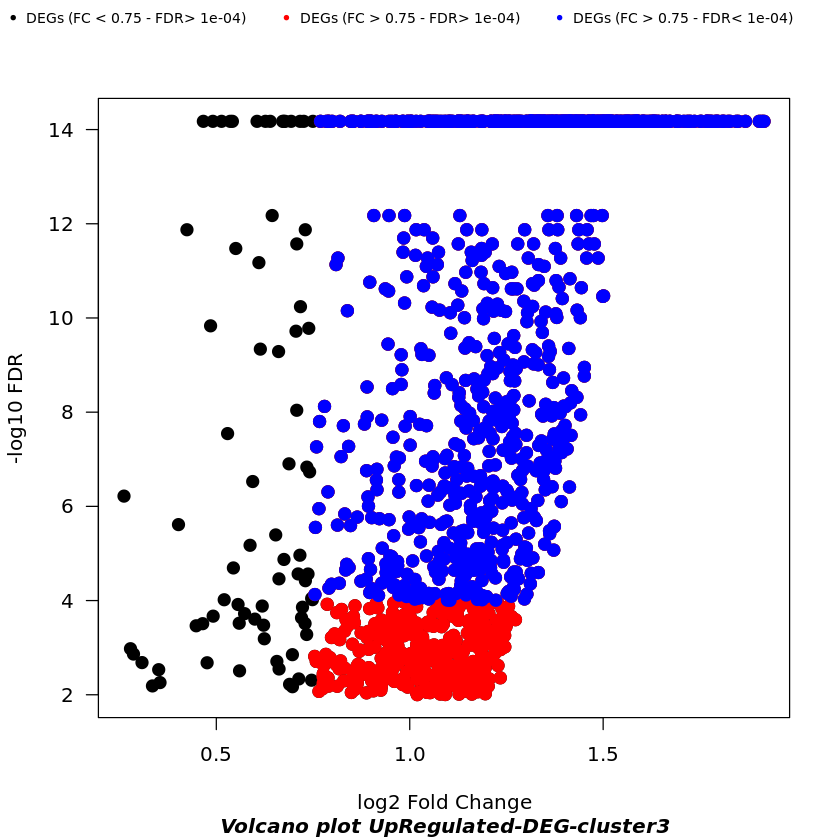

In [3]:
name<-"UpRegulated-DEG-cluster3"  ############ Selecting the DEGs'
U<-read.csv(file="UpRegulated-DEG-cluster3.csv",head=TRUE,sep=",")
Vplot<-VolcanoPlot(U,value=0.0001,name=name,FS=0.7,fc=0.75)

### 4. Identifying biomarkers (decision trees and networking analysis) 

In [4]:
###################### Finding biomarker genes between cluster 3 and cluster 4
First="CL3"
Second="CL4"
load("FGDATAforDT.RData")            # Preparing the dataset for the decision trees

### 4.1. J48 Decision Tree

J48 pruned tree
------------------

YWHAH <= 2.485448: CL3 (322.0/1.0)
YWHAH > 2.485448
|   PTCRA <= 0.844507
|   |   PEA15 <= 0.545646: CL4 (14.0/1.0)
|   |   PEA15 > 0.545646: CL3 (11.0)
|   PTCRA > 0.844507: CL4 (562.0)

Number of Leaves  : 	4

Size of the tree : 	7




=== Summary ===

Correctly Classified Instances         907               99.78   %
Incorrectly Classified Instances         2                0.22   %
Kappa statistic                          0.9953
Mean absolute error                      0.0042
Root mean squared error                  0.046 
Relative absolute error                  0.9123 %
Root relative squared error              9.5525 %
Total Number of Instances              909     

=== Confusion Matrix ===

   a   b   <-- classified as
 332   1 |   a = CL3
   1 575 |   b = CL4

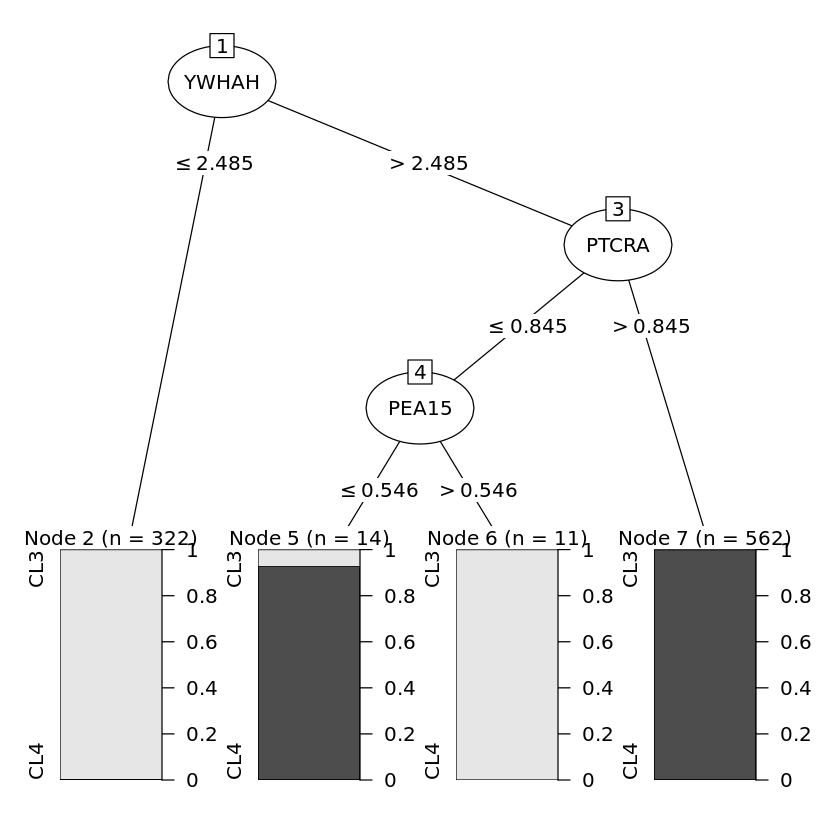

In [5]:
j48dt<-J48DT(FGDATAforDT)           #J48 Decision Tree
summary(j48dt)
rm(j48dt)

### 4.2. RPART Decision Tree

n= 909 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 909 333 CL4 (0.366336634 0.633663366)  
   2) YWHAH< 2.495651 322   1 CL3 (0.996894410 0.003105590)  
     4) RIOK3< 5.532748 321   0 CL3 (1.000000000 0.000000000) *
     5) RIOK3>=5.532748 1   0 CL4 (0.000000000 1.000000000) *
   3) YWHAH>=2.495651 587  12 CL4 (0.020442930 0.979557070)  
     6) PF4< 0.1469055 8   0 CL3 (1.000000000 0.000000000) *
     7) PF4>=0.1469055 579   4 CL4 (0.006908463 0.993091537)  
      14) DSTN>=7.45938 4   1 CL3 (0.750000000 0.250000000)  
        28) CFLAR< 6.60945 3   0 CL3 (1.000000000 0.000000000) *
        29) CFLAR>=6.60945 1   0 CL4 (0.000000000 1.000000000) *
      15) DSTN< 7.45938 575   1 CL4 (0.001739130 0.998260870)  
        30) TMEM132A>=1.087652 1   0 CL3 (1.000000000 0.000000000) *
        31) TMEM132A< 1.087652 574   0 CL4 (0.000000000 1.000000000) *


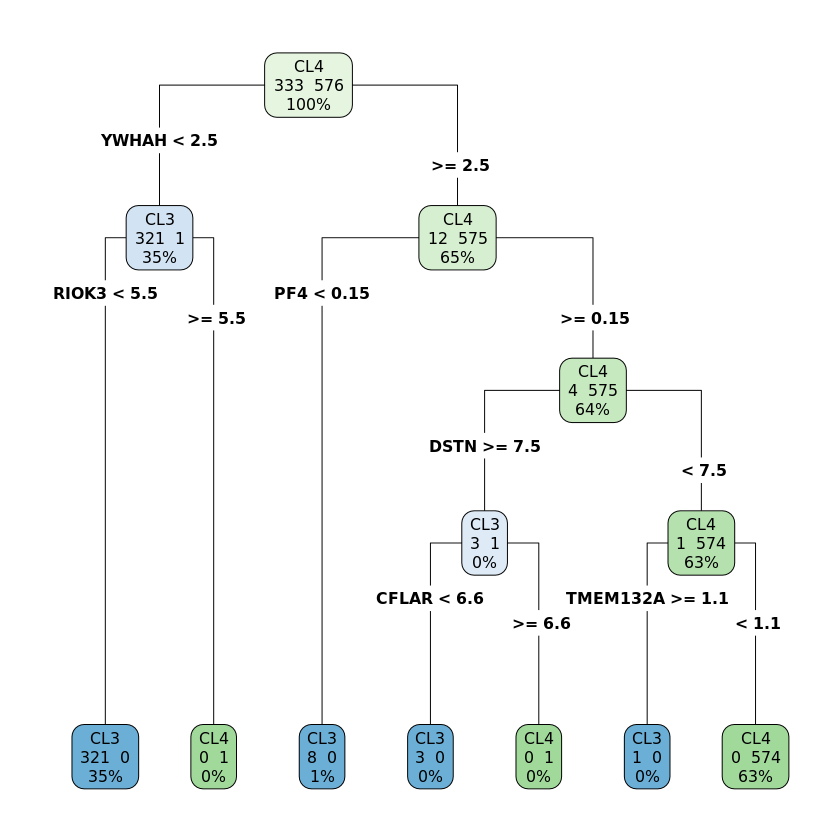

In [6]:
rpartDT<-RpartDT(FGDATAforDT)
rm(rpartDT)

### 4.3. Networking Analysis

In [7]:
############ Selecting the DEGs' table  ##############
data<-read.csv(file="UpRegulated-DEG-cluster3.csv",head=TRUE,sep=",")
data<-as.character(data[1:200,3])                              ## Checking the first 200 DEGs             

###### Getting the protein-protein interactions  #############
ppi<-PPI(data)

#############   Networking Analysis  ################
networking<-NetAnalysis(ppi)
networking                            ##### In case the Examine response components = 200 and an error "linkmat[i, ]" appeared, that means there are no PPI.

############ Plotting the Network  ##################
Data<-data[1:100]           ## Plotting the first 100 DEGs      
network<-Networking(Data)

Examine response components = 200	(200 means successful)



── Column specification ────────────────────────────────────────────────────────
cols(
  stringId_A = col_character(),
  stringId_B = col_character(),
  preferredName_A = col_character(),
  preferredName_B = col_character(),
  ncbiTaxonId = col_double(),
  score = col_double(),
  nscore = col_double(),
  fscore = col_double(),
  pscore = col_double(),
  ascore = col_double(),
  escore = col_double(),
  dscore = col_double(),
  tscore = col_double()
)


Number of nodes: 170

Number of links: 576

Link Density: 3.38823529411765

The connectance of the graph: 0.020048729550992

Mean Distences2.7073837739289

Average Path Length2.7073837739289




,names,degree,betweenness
,<chr>,<dbl>,<dbl>
80,HSP90AA1,76,1249.639427
85,ACTB,52,861.030922
50,CDH1,48,353.052442
129,RPLP0,48,46.815110
122,RPL6,46,169.209038
36,ENO1,44,99.933333
77,HSPA5,42,377.308028
97,HSP90AB1,40,164.412599
28,AURKA,38,183.505189


Examine response components =200	(200 means successful)


You can see the network with high resolution by clicking on the following link:
https://string-db.org/api/highres_image/network?identifiers=FUCA2%0dCYP51A1%0dICA1%0dARF5%0dFKBP4%0dNDUFAB1%0dSLC25A5%0dITGA3%0dLAMP2%0dTMEM132A%0dCX3CL1%0dTNFRSF12A%0dRALA%0dBAIAP2L1%0dGGCT%0dARSD%0dPSMB1%0dTFAP2B%0dSYPL1%0dCYB561%0dMGST1%0dST3GAL1%0dUQCRC1%0dCD9%0dNME1-NME2%0dANLN%0dMAP4K3%0dLTF%0dELOVL5%0dUBR7%0dPSMC4%0dSLC25A39%0dMVP%0dPGM3%0dMDH1%0dMATR3%0dNUDCD3%0dWWTR1%0dRNH1%0dTOMM34%0dSEC63%0dVIM%0dCD44%0dVEZT%0dSLC39A9%0dGRN%0dTMSB10%0dRNF19A%0dSH3YL1%0dFAM136A%0dNSUN2%0dCDH1%0dPSMA4%0dLSG1%0dCAPG%0dCTNNA1%0dHSPA5%0dDSG2%0dTPR%0dMAP4%0dVAMP3%0dHEXB%0dLIMA1%0dHERPUD1%0dHEBP2%0dPRSS8%0dTTC17%0dPHPT1%0dSYNE2%0dNOP58%0dEIF2AK2%0dTRAF3IP2%0dGDI2%0dATG5%0dSEC61A1%0dCCAR1%0dMRPS35%0dGPBP1%0dCS%0dMRPS24%0dEIF4B%0dRPL18%0dLIMCH1%0dTAF2%0dSLC12A2%0dBCAS1%0dSLC9A3R2%0dIPO5%0dOAT%0dERBB3%0dNDUFB4%0dPFKP%0dIDI1%0dTNFRSF1A%0dIARS2%0dCOASY%0dLAPTM4A%0dPIT

ERROR: Error in readPNG(FileName, native = TRUE): file is not in PNG format


### 4.4 Gene Enrichment Analysis

In [8]:
############ Selecting the DEGs' table  ##############
data<-read.csv(file="UpRegulated-DEG-cluster3.csv",head=TRUE,sep=",")  # Up-regulated genes in cluster 3 (from the Binomial analysis)
data<-as.character(data[,3])                              ## Checking the first 200 DEGs             

dbs <- c("KEGG_2019_Human","GO_Biological_Process_2018")
enriched <- enrichr(data, dbs)
KEGG_2019_Human<-enriched[[1]][,c(1,2,3,9)]
GO_Biological_Process_2018<-enriched[[2]][,c(1,2,3,9)]

GEA<-rbind(KEGG_2019_Human,GO_Biological_Process_2018)
GEA

Uploading data to Enrichr... Done.
  Querying KEGG_2019_Human... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


Term,Overlap,P.value,Genes
<chr>,<chr>,<dbl>,<chr>
Ribosome,62/153,6.908833e-33,RPL4;RPL5;RPL30;RPL3;MRPS16;RPL31;MRPS11;RPLP1;MRPS12;RPLP0;RPL10A;RPL6;RPL7;RPS15;RPS4X;RPS14;MRPL3;RPS16;RPL18A;RPL36;RPL38;RPL37;MRPL9;RPS10;RPS13;RPS12;RPS7;RPS8;RPS5;RPS6;MRPS18A;RPL13A;MRPS2;MRPS21;RPSA;RPS3A;MRPS7;RPL37A;RPL24;RPL26;RPL29;RPL12;RPL11;MRPL14;MRPL15;MRPL13;RPS15A;RPL14;RPS3;RPL13;RPS2;RPL18;RPL17;RPL19;RPL41;MRPL27;RPL35A;MRPL24;RPS27;FAU;RPS24;RPS23
Proteasome,28/45,4.226587e-22,PSMD12;PSMD14;PSMA7;PSMD8;PSMB6;PSMB7;PSMB4;PSMD7;PSMB5;PSMD4;PSMB2;PSMB3;PSMD2;PSMB1;PSMD3;PSMD1;PSMF1;ADRM1;PSMA5;PSMA6;PSMC5;PSMA3;PSMA4;PSMC3;PSMC4;PSME3;PSMC2;PSME1
Protein processing in endoplasmic reticulum,52/165,7.932964e-22,HSP90AB1;HERPUD1;SEC61A1;SEC61G;CAPN2;SEC61B;SIL1;SEC63;SKP1;PDIA3;SEC13;HSP90AA1;SSR2;SSR3;PDIA6;CKAP4;DDOST;PDIA4;DNAJC3;DNAJC1;CANX;ERP29;MAN1B1;VCP;SAR1A;RPN2;SAR1B;RPN1;DERL1;RRBP1;DNAJB1;GANAB;HSPH1;OS9;LMAN2;BAG1;UBQLN1;TXNDC5;SEC31A;HSPA8;MBTPS1;XBP1;HSPA5;WFS1;EIF2AK2;HSPA2;EIF2S1;DNAJA1;DNAJC10;STT3A;CALR;P4HB
Huntington disease,53/193,3.437623e-19,NDUFA13;NDUFA11;NDUFA12;COX4I1;CLTC;NDUFA10;COX6A1;CREB3L4;UQCRFS1;AP2M1;TGM2;COX8A;NDUFC2;SDHA;SDHB;COX6B1;CREB3;NDUFS7;NDUFS6;UQCRC1;NDUFS3;NDUFS2;VDAC1;UQCRC2;SLC25A5;SLC25A4;SLC25A6;NDUFB9;NDUFB10;NDUFB6;NDUFB5;NDUFB4;COX7A2;COX5B;COX5A;POLR2A;CYC1;POLR2H;NDUFV2;POLR2I;NDUFV1;POLR2K;POLR2L;NDUFA9;NDUFA8;NDUFA4;NDUFA2;NDUFA1;COX6C;SOD1;UQCRQ;NDUFAB1;CYCS
Oxidative phosphorylation,43/133,9.341894e-19,NDUFB9;NDUFA13;NDUFA11;NDUFB10;NDUFB6;NDUFA12;NDUFB5;COX4I1;NDUFB4;NDUFA10;COX7A2;COX6A1;COX5B;COX5A;UQCRFS1;CYC1;NDUFV2;NDUFV1;ATP6V1C1;ATP6V1C2;COX8A;NDUFA9;NDUFA8;ATP6V1G1;ATP6V0B;NDUFA4;NDUFA2;NDUFA1;NDUFC2;SDHA;COX6C;SDHB;COX6B1;PPA2;NDUFS7;PPA1;UQCRQ;NDUFS6;NDUFAB1;UQCRC1;NDUFS3;NDUFS2;UQCRC2
Parkinson disease,44/142,2.337302e-18,NDUFB9;NDUFA13;NDUFA11;NDUFB10;NDUFB6;NDUFA12;NDUFB5;COX4I1;NDUFB4;NDUFA10;UBE2L6;COX7A2;COX6A1;COX5B;COX5A;UBB;UQCRFS1;CYC1;NDUFV2;NDUFV1;COX8A;NDUFA9;NDUFA8;NDUFA4;NDUFA2;NDUFA1;NDUFC2;SDHA;COX6C;SDHB;COX6B1;NDUFS7;UQCRQ;NDUFS6;NDUFAB1;UQCRC1;NDUFS3;CYCS;NDUFS2;VDAC1;UQCRC2;SLC25A5;SLC25A4;SLC25A6
Non-alcoholic fatty liver disease (NAFLD),43/149,1.079111e-16,NDUFB9;NDUFA13;NDUFA11;NDUFB10;NDUFB6;NDUFA12;NDUFB5;COX4I1;NDUFB4;NDUFA10;COX7A2;COX6A1;COX5B;COX5A;UQCRFS1;CYC1;NDUFV2;NDUFV1;COX8A;NDUFA9;NDUFA8;XBP1;JUN;NDUFA4;INSR;NDUFA2;NDUFA1;NDUFC2;SDHA;COX6C;SDHB;EIF2S1;COX6B1;TNFRSF1A;NDUFS7;UQCRQ;NDUFS6;NDUFAB1;UQCRC1;NDUFS3;CYCS;NDUFS2;UQCRC2
Alzheimer disease,46/171,1.868690e-16,NDUFB9;NDUFA13;CALML5;NDUFA11;NDUFB10;NDUFB6;NDUFA12;NDUFB5;COX4I1;NDUFB4;NDUFA10;COX7A2;ITPR3;COX6A1;COX5B;COX5A;NCSTN;CAPN2;UQCRFS1;CYC1;NDUFV2;NDUFV1;COX8A;PSENEN;NDUFA9;NDUFA8;NDUFA4;NDUFA2;NDUFA1;NDUFC2;SDHA;COX6C;SDHB;COX6B1;TNFRSF1A;NDUFS7;UQCRQ;NDUFS6;NDUFAB1;UQCRC1;NDUFS3;CYCS;NDUFS2;UQCRC2;CALM2;GAPDH
Thermogenesis,50/231,1.135281e-13,NDUFA13;NDUFA11;NDUFA12;COX4I1;NDUFA10;COX6A1;ACTB;CREB3L4;UQCRFS1;COX8A;SMARCC1;ACTL6A;RPS6;NDUFC2;ACSL3;SDHA;SDHB;COX6B1;CREB3;NDUFS7;NDUFS6;UQCRC1;NDUFS3;NDUFS2;UQCRC2;NDUFB9;NDUFB10;COX16;NDUFB6;NDUFB5;NDUFB4;COX7A2;COX5B;COX5A;SLC25A29;COX14;CYC1;NDUFV2;NDUFV1;NDUFA9;NDUFA8;NDUFA4;NDUFA2;NDUFA1;COX6C;SMARCA4;MAPK13;UQCRQ;NDUFAB1;FGFR1


## Correlation test

Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables (genes).

In [10]:
load("fg.RData")               # Loading the "fg" object that has include the data of the k-means clustering 
FG<-fg  
FG<-pseudoTimeOrdering(FG,quiet = TRUE, export = FALSE)
FG@kordering<-FG@kordering[order(-FG@kordering)]
NewNames<-names(FG@kordering)
OrderedDataSet<-FG@ndata
for (i in 1:length(FG@kordering)){
	OrderedDataSet[1:length(FG@ndata[,1]),i]<-FG@ndata[1:length(FG@ndata[,1]),FG@kordering[i]]
}
colnames(OrderedDataSet)<-NewNames
COL=rainbow(20)

In [12]:
## Spearman correlation between TGFB1 and KRT18
KRT18<-as.numeric(OrderedDataSet["ENSG00000111057",])
TGFB1<-as.numeric(OrderedDataSet["ENSG00000105329",])
cor.test(TGFB1,KRT18, method = "spearman",exact=F)


	Spearman's rank correlation rho

data:  TGFB1 and KRT18
S = 822125956, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.624741 


In [13]:
## Spearman correlation between MMD and ZEB1
MMD<-as.numeric(OrderedDataSet["ENSG00000108960",])
ZEB1<-as.numeric(OrderedDataSet["ENSG00000148516",])
cor.test(MMD, ZEB1, method = "spearman",,exact=F)


	Spearman's rank correlation rho

data:  MMD and ZEB1
S = 5.91e+08, p-value = 1.259e-10
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1679735 


## Gene Profiling

Gene profiling is the measurement of the activity of a set of genes across tje clusters. We ordered the clusters here based on the pseudo-time orderong from right to left.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = 

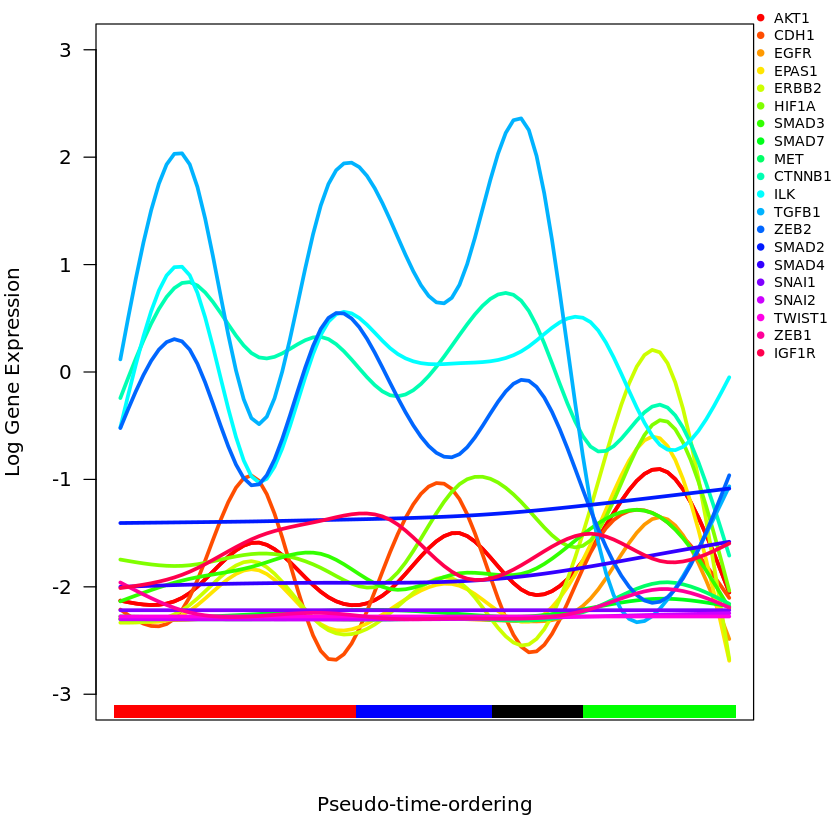

In [14]:
################## Loading the EMT gene list
S <- read.csv(file = "EMT_List.csv", sep = ",",header=F)    

#######################  Plotting the expression of each gene
gene<-S[1,1]
cells<-c(1:length(FG@ndata[1,]))
expression=log(t(OrderedDataSet[gene,]))
names(expression)=NULL
ID<-c(rep(gene,1448))
NewDF1=data.frame(expression,cells,ID)
rownames(NewDF1)=NULL
colnames(NewDF1)=c("expression","cells","GeneID")
########################################################### to get the smooth line
p=ggplot(NewDF1,aes(x=cells,y=expression),colour=col) + 
    # Line for each gene
    geom_smooth(size = 2, se = F, color = "orange")+ 
	labs(y="Gene Expression", x = "Cells' pseudotime order")

g<-ggplot_build(p)
par(mar = c(5, 4, 1, 3.6))
plot(g$data[[1]][,1],g$data[[1]][,2],col=COL[1], type="l",
	las=1,xlab="Pseudo-time-ordering",ylab="Log Gene Expression",ylim=c(-3,3),lwd = 3,xaxt = "n")

############################### to show cluster ID at the x axis
part=FG@kmeans$kpart  
col=c()
for (i in NewNames){
	col=c(col,as.numeric(part[i]))
}
coll = c("black", "blue", "green", "red", "yellow", "gray")
for (i in 1: length(part)){
	points(i,-3.16,col = coll[col[i]],pch = 15, cex = 1.5)
} 

genes<-S[,1]
SYM<-S[,2]
for ( i in 1:length(S[,1])){
	gene<-genes[i]
	cells<-c(1:1448)
	expression=log(t(OrderedDataSet[gene,]))
	names(expression)=NULL
	ID<-c(rep(gene,1448))
	NewDF3=data.frame(expression,cells,ID)
	rownames(NewDF3)=NULL
	colnames(NewDF3)=c("expression","cells","GeneID")
	p=ggplot(NewDF3,aes(x=cells,y=expression),colour=col) + 
	    # Line for each gene
	    geom_smooth(size = 2, se = F, color = COL[i])+ 
		labs(y="Gene Expression", x = "Cells' pseudotime order")
	ggg<-ggplot_build(p) ############################# to extract the xy
	lines(ggg$data[[1]][,1],ggg$data[[1]][,2],col=COL[i],lwd = 3)
}

add_legend <- function(...) {
  opar <- par(fig=c(0, 1, 0, 1), oma=c(0, 0, 0, 0), 
    mar=c(0, 0, 0, 0), new=TRUE)
  on.exit(par(opar))
  plot(0, 0, type='n', bty='n', xaxt='n', yaxt='n')
  legend(...)
}
add_legend("topright", legend=SYM, pch=19, 
   col=COL[1:length(S[,1])],   horiz=F, bty='n', cex=0.7)